In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("benchmark_results.csv")

In [8]:
summary = (
    df
    .groupby(["protein_id", "implementation"])
    .agg(
        mean_time=("time_seconds", "mean"),
        std_time=("time_seconds", "std"),
        median_time=("time_seconds", "median"),
    )
    .reset_index()
)

summary

,protein_id,implementation,mean_time,std_time,median_time
0,clbA,new,0.814773,0.026114,0.809333
1,clbA,old,2.317265,0.015457,2.317475
2,clbB,new,0.816535,0.025833,0.813349
3,clbB,old,0.814947,0.013527,0.813012
4,clbC,new,0.817034,0.017281,0.814920
5,clbC,old,2.317089,0.013686,2.315935
6,clbD,new,0.814975,0.013162,0.817004
7,clbD,old,1.315853,0.012855,1.315740
8,clbF,new,0.811714,0.012251,0.808563
9,clbF,old,1.825779,0.067136,1.817535


In [9]:
mean_pivot = summary.pivot(
    index="protein_id",
    columns="implementation",
    values="mean_time"
)

std_pivot = summary.pivot(
    index="protein_id",
    columns="implementation",
    values="std_time"
)

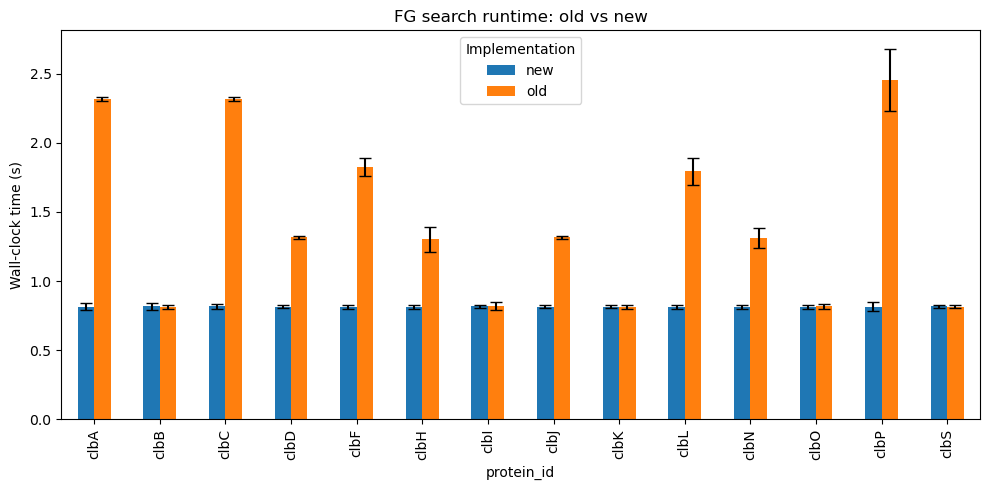

In [10]:
ax = mean_pivot.plot(
    kind="bar",
    yerr=std_pivot,
    capsize=4,
    figsize=(10, 5)
)

ax.set_ylabel("Wall-clock time (s)")
ax.set_title("FG search runtime: old vs new")
ax.legend(title="Implementation")

plt.tight_layout()
plt.show()

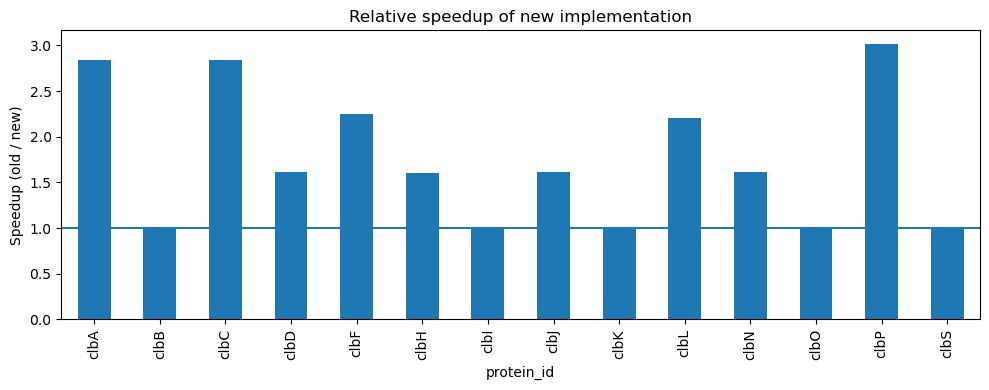

In [11]:
speedup = mean_pivot["old"] / mean_pivot["new"]

ax = speedup.plot(
    kind="bar",
    figsize=(10, 4)
)

ax.axhline(1.0)
ax.set_ylabel("Speedup (old / new)")
ax.set_title("Relative speedup of new implementation")

plt.tight_layout()
plt.show()

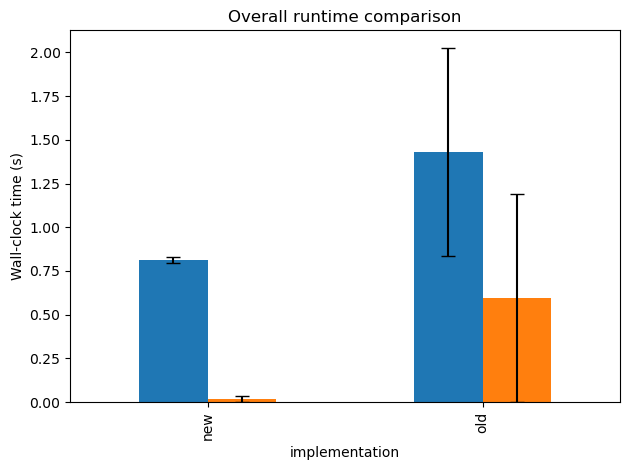

In [12]:
global_summary = (
    df
    .groupby("implementation")
    .agg(
        mean=("time_seconds", "mean"),
        std=("time_seconds", "std")
    )
)

global_summary.plot(
    kind="bar",
    yerr=global_summary["std"],
    capsize=5,
    legend=False
)

plt.ylabel("Wall-clock time (s)")
plt.title("Overall runtime comparison")
plt.tight_layout()
plt.show()